In [33]:
#import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn import tree
# !pip install graphviz
import graphviz


# Read in the datav and observe the first few rows
df=pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [3]:
#finding the unqiue values in the target column
df['hours_per_week_bin'].unique()

array(['b. 31-40', 'a. 0-30', 'd. 41-50 & 61-70', 'c. 71-100', 'e. 51-60'],
      dtype=object)

2. Data Quality Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [5]:
#checking number of rows and columns in the data
df.shape

(48842, 11)

In [6]:
#checking for missing values
df.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [7]:
#checking datad descriptive statistics
df.describe()

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [8]:
#initiating the data quality report table
data_quality_report = pd.DataFrame(columns=['Feature', 'Count', 'Missing_percentage', 'Cardinality', 'Mode','Mode_freq','Mode_percentage','2nd_mode','2nd_mode_freq','2nd_mode_percentage'])

data_quality_report

,Feature,Count,Missing_percentage,Cardinality,Mode,Mode_freq,Mode_percentage,2nd_mode,2nd_mode_freq,2nd_mode_percentage


In [9]:
#adding the details of each feature to the data quality report table
data_quality_report['Feature'] = df.columns

#adding the count of each feature to the data quality report table
for i in range(len(df.columns)):
    data_quality_report['Count'][i] = df.iloc[:,i].count()

#adding the missing percentage of each feature to the data quality report table
for i in range(len(df.columns)):
    data_quality_report['Missing_percentage'][i] = (df.shape[0] - data_quality_report['Count'][i])/df.shape[0]

#adding the cardinality of each feature to the data quality report table
for i in range(len(df.columns)):
    data_quality_report['Cardinality'][i] = df.iloc[:,i].nunique()

#adding the mode of each feature to the data quality report table
for i in range(len(df.columns)):
    data_quality_report['Mode'][i] = df.iloc[:,i].mode()[0]

#adding the mode frequency of each feature to the data quality report table
for i in range(len(df.columns)):
    data_quality_report['Mode_freq'][i] = df.iloc[:,i].value_counts().max()

#adding the mode percentage of each feature to the data quality report table
for i in range(len(df.columns)):
    data_quality_report['Mode_percentage'][i] = data_quality_report['Mode_freq'][i]/df.shape[0]

#adding the 2nd mode of each feature to the data quality report table
for i in range(len(df.columns)):
    data_quality_report['2nd_mode'][i] = df.iloc[:,i].value_counts().index[1]

#adding the 2nd mode frequency of each feature to the data quality report table
for i in range(len(df.columns)):
    data_quality_report['2nd_mode_freq'][i] = df.iloc[:,i].value_counts().iloc[1]

#adding the 2nd mode percentage of each feature to the data quality report table
for i in range(len(df.columns)):
    data_quality_report['2nd_mode_percentage'][i] = data_quality_report['2nd_mode_freq'][i]/df.shape[0]

#displaying the data quality report table
data_quality_report

,Feature,Count,Missing_percentage,Cardinality,Mode,Mode_freq,Mode_percentage,2nd_mode,2nd_mode_freq,2nd_mode_percentage
0,hours_per_week_bin,48842,0.0,5,b. 31-40,26639,0.545412,d. 41-50 & 61-70,9819,0.201036
1,occupation_bin,48842,0.0,5,c. Mid - Mid,13971,0.286045,b. Mid - Low,12947,0.265079
2,msr_bin,48842,0.0,3,c. High,22047,0.451394,b. Mid,15868,0.324884
3,capital_gl_bin,48842,0.0,3,a. = 0,42525,0.870665,c. > 0,4035,0.082613
4,race_sex_bin,48842,0.0,3,c. High,29737,0.608841,b. Mid,16457,0.336944
5,education_num_bin,48842,0.0,5,b. 9-12,30324,0.620859,c. 13,8025,0.164305
6,education_bin,48842,0.0,5,b. Mid,30324,0.620859,c. Bachelors,8025,0.164305
7,workclass_bin,48842,0.0,2,b. income,46012,0.942058,a. no income,2830,0.057942
8,age_bin,48842,0.0,5,e. 40-55,13963,0.285881,a. 0-25,9627,0.197105
9,flag,48842,0.0,2,train,32561,0.66666,test,16281,0.33334


In [10]:
#converting the features to numerical values
categorical_features = ['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']
df = pd.get_dummies(df, columns=categorical_features)

3. Build Decision Tree Classifier Models

In [11]:
x=df.drop(columns=['y','flag'])
y=df['y']

# Splitting the dataframe into training and testing sets based on the 'flag' feature
train_data = df[df['flag'] == 'train']
test_data = df[df['flag'] != 'train']

X_train = train_data.drop(columns=['y', 'flag'])
y_train = train_data['y']
X_test = test_data.drop(columns=['y', 'flag'])
y_test = test_data['y']

# Initialize the Decision Tree Classifier
classifier = DecisionTreeClassifier(max_depth=3, random_state=42,max_features=None, min_samples_leaf=15)

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)


4. Evaluate Decision Tree Performance

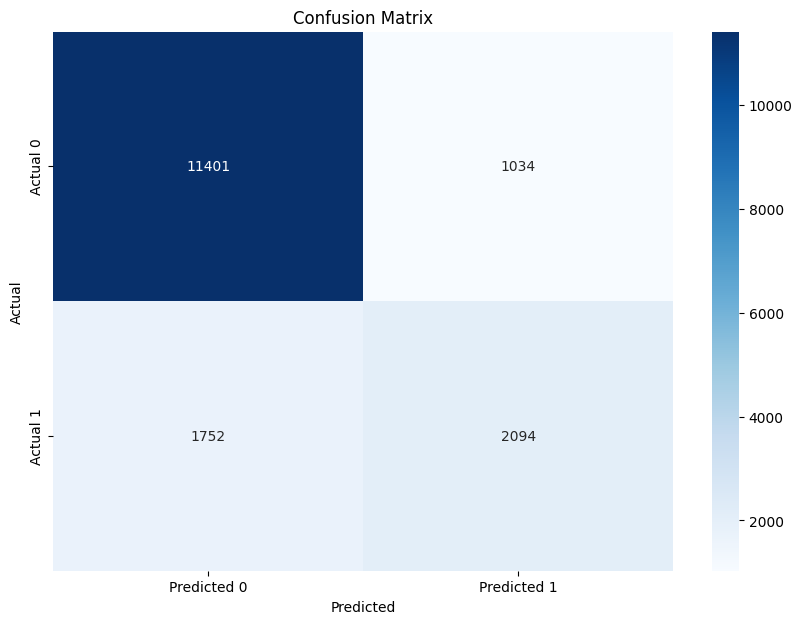

Accuracy: 0.8289
Precision: 0.6694
Recall: 0.5445
F1 Score: 0.6005


In [12]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix with seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Calculating other metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing other metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

5. Tune Decision Tree Performance

In [17]:
# Split Criteria

split_df = pd.DataFrame(columns=['Split Criteria','Accuracy', 'Recall', 'Precision', 'F1 Score'])
split_criteria_options = ['entropy', 'gini']

for split in split_criteria_options:
    # Initialize the Decision Tree Classifier
    classifier = DecisionTreeClassifier(criterion=split, random_state=42)

    # Fit the classifier to the training data
    classifier.fit(X_train, y_train)

    # Predict the test set results
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    new_row_df = pd.DataFrame([[split, accuracy, recall, precision, f1]], columns=split_df.columns)

    split_df = pd.concat([split_df, new_row_df], ignore_index=True)

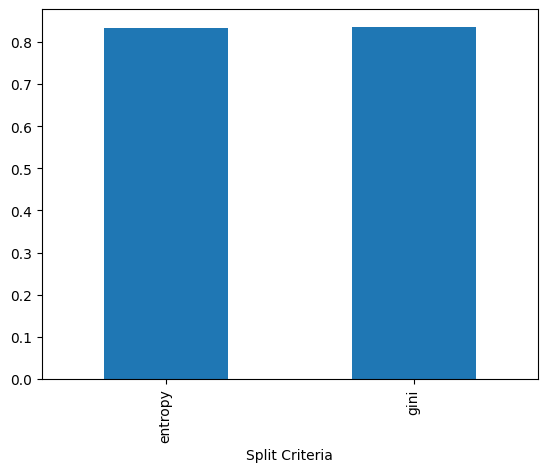

,Split Criteria,Accuracy,Recall,Precision,F1 Score
0,entropy,0.834715,0.554082,0.685871,0.612973
1,gini,0.836312,0.553822,0.691783,0.615162


In [24]:
# From this, we can see that the gini method performs marginally better

split_df.plot(kind='bar', x='Split Criteria', y='Accuracy', legend=None)
plt.show()

split_df

In [19]:
# Minimum Sample Leaf

leaf_df = pd.DataFrame(columns=['Min Sample Leaf','Accuracy', 'Recall', 'Precision', 'F1 Score'])
leaf_criteria_options = [5,10,15,20,25,30,35,40]

for leaf in leaf_criteria_options:
    # Initialize the Decision Tree Classifier
    classifier = DecisionTreeClassifier(criterion='gini', random_state=42, min_samples_leaf=leaf)

    # Fit the classifier to the training data
    classifier.fit(X_train, y_train)

    # Predict the test set results
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    new_row_df = pd.DataFrame([[leaf, accuracy, recall, precision, f1]], columns=leaf_df.columns)

    leaf_df = pd.concat([leaf_df, new_row_df], ignore_index=True)

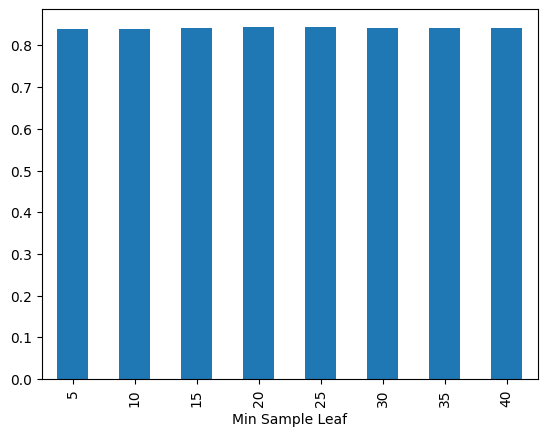

,Min Sample Leaf,Accuracy,Recall,Precision,F1 Score
0,5,0.838523,0.557722,0.698015,0.620032
1,10,0.839936,0.561102,0.701560,0.623519
2,15,0.841963,0.560322,0.709582,0.626180
3,20,0.844051,0.565523,0.714755,0.631441
4,25,0.843314,0.566303,0.711532,0.630665
5,30,0.842270,0.557202,0.712434,0.625328
6,35,0.843069,0.559802,0.714096,0.627605
7,40,0.842454,0.556942,0.713287,0.625493


In [25]:
# From this, we can see that min_leaf_sample = 20 performed best (marginally)

leaf_df.plot(kind='bar', x='Min Sample Leaf', y='Accuracy', legend=None)
plt.show()

leaf_df

In [22]:
# Maximum Feature

feat_df = pd.DataFrame(columns=['Maximum Feature','Accuracy', 'Recall', 'Precision', 'F1 Score'])
feat_criteria_options = ['auto', None, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

for feat in feat_criteria_options:
    # Initialize the Decision Tree Classifier
    classifier = DecisionTreeClassifier(criterion='gini', random_state=42, min_samples_leaf=20, max_features=feat)

    # Fit the classifier to the training data
    classifier.fit(X_train, y_train)

    # Predict the test set results
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    new_row_df = pd.DataFrame([[feat, accuracy, recall, precision, f1]], columns=feat_df.columns)

    feat_df = pd.concat([feat_df, new_row_df], ignore_index=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


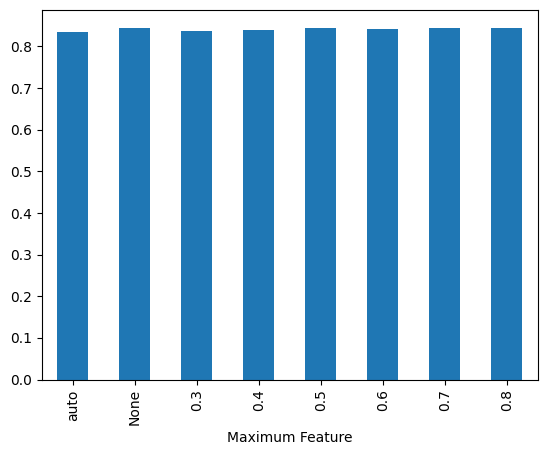

,Maximum Feature,Accuracy,Recall,Precision,F1 Score
0,auto,0.834777,0.566563,0.680512,0.618331
1,None,0.844051,0.565523,0.714755,0.631441
2,0.3,0.837725,0.592824,0.679380,0.633157
3,0.4,0.838523,0.560322,0.696735,0.621127
4,0.5,0.845280,0.567603,0.718328,0.634132
5,0.6,0.842024,0.562923,0.708442,0.627354
6,0.7,0.843990,0.567863,0.713259,0.632310
7,0.8,0.845341,0.568123,0.718277,0.634437


In [26]:
# From this, we can see that max_features = 0.8 performed best

feat_df.plot(kind='bar', x='Maximum Feature', y='Accuracy', legend=None)
plt.show()

feat_df

In [29]:
# Maximum Depth

depth_df = pd.DataFrame(columns=['Maximum Depth','Accuracy', 'Recall', 'Precision', 'F1 Score'])
depth_criteria_options = [2,4,6,8,10,12,14,16]

for depth in depth_criteria_options:
    # Initialize the Decision Tree Classifier
    classifier = DecisionTreeClassifier(criterion='gini', random_state=42, min_samples_leaf=20, max_features=0.8, max_depth=depth)

    # Fit the classifier to the training data
    classifier.fit(X_train, y_train)

    # Predict the test set results
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    new_row_df = pd.DataFrame([[depth, accuracy, recall, precision, f1]], columns=depth_df.columns)

    depth_df = pd.concat([depth_df, new_row_df], ignore_index=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


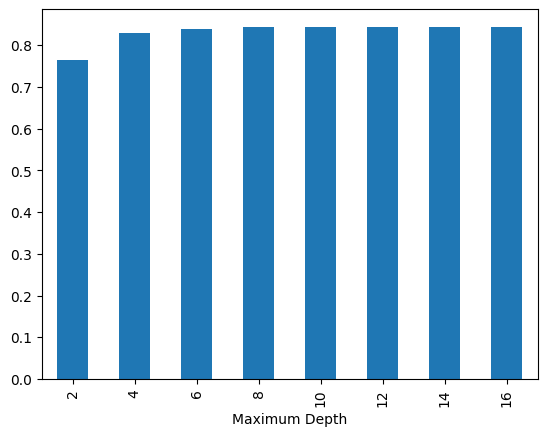

,Maximum Depth,Accuracy,Recall,Precision,F1 Score
0,2,0.763774,0.000000,0.000000,0.000000
1,4,0.830723,0.459178,0.723178,0.561705
2,6,0.840366,0.595684,0.686957,0.638073
3,8,0.843437,0.560842,0.714949,0.628588
4,10,0.844113,0.553562,0.721695,0.626545
5,12,0.843744,0.569423,0.711501,0.632582
6,14,0.843437,0.570203,0.709938,0.632444
7,16,0.843683,0.559542,0.716617,0.628413


In [30]:
# From this, we can see that max_depth = 10 performed best

depth_df.plot(kind='bar', x='Maximum Depth', y='Accuracy', legend=None)
plt.show()

depth_df

6. Visualize Your Best Decision Tree using GraphViz

In [50]:
final_classifier = DecisionTreeClassifier(criterion='gini', random_state=42, min_samples_leaf=20, max_features=0.8, max_depth=10)
final_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=0.8, min_samples_leaf=20,
                       random_state=42)

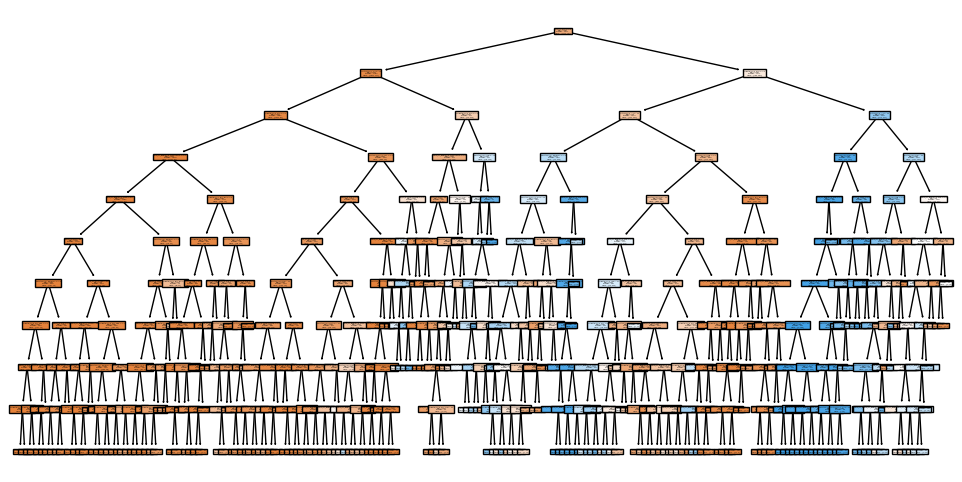

In [49]:
plt.figure(figsize=(12, 6))
tree.plot_tree(final_classifier, filled=True, feature_names=X_train.columns)
plt.show()

7. Conclusion

Q.4: How long was your total run time to train the best model?
Fast, 0.0 seconds

Q.5: Did you find the BEST TREE?
I think so, could probably be improved by exploring different combinations of paramaters

Q.6: Write your observations from the visualization of the best tree.
The clusters seem to be clustered by color, indicating that the decision tree is working

Q.7: Will this tree "overfit"?
No, the thresholds for the parameters haven't been met yet (?)

8. Prediction using your "trained" Decision Tree Model

In [57]:
X_train.columns

Index(['hours_per_week_bin_a. 0-30', 'hours_per_week_bin_b. 31-40',
       'hours_per_week_bin_c. 71-100', 'hours_per_week_bin_d. 41-50 & 61-70',
       'hours_per_week_bin_e. 51-60', 'occupation_bin_a. Low',
       'occupation_bin_b. Mid - Low', 'occupation_bin_c. Mid - Mid',
       'occupation_bin_d. Mid - High', 'occupation_bin_e. High',
       'msr_bin_a. Low', 'msr_bin_b. Mid', 'msr_bin_c. High',
       'capital_gl_bin_a. = 0', 'capital_gl_bin_b. < 0',
       'capital_gl_bin_c. > 0', 'race_sex_bin_a. Low', 'race_sex_bin_b. Mid',
       'race_sex_bin_c. High', 'education_num_bin_a. 0-8',
       'education_num_bin_b. 9-12', 'education_num_bin_c. 13',
       'education_num_bin_d. 14', 'education_num_bin_e. 15+',
       'education_bin_a. Low', 'education_bin_b. Mid',
       'education_bin_c. Bachelors', 'education_bin_d. Masters',
       'education_bin_e. High', 'workclass_bin_a. no income',
       'workclass_bin_b. income', 'age_bin_a. 0-25',
       'age_bin_b. 26-30 & 71-100', 'age_

In [61]:
values = [False, False, False, True, False, False, True, False, False, False, False, False, True, False, False, True, False, True, False, False, True, False, False, False, False, False, False, False, True, False, True, False, False, False, True, False]
prediction_df = pd.DataFrame([values], columns=X_train.columns)

prediction = final_classifier.predict(prediction_df)
probability = final_classifier.predict_proba(prediction_df)

In [63]:
print(prediction)
print(probability)

[1]
[[0.28858025 0.71141975]]


Q.8 What is the probability that your prediction for this person is correct?

The model predicts that the individal make over 50k (1), and for an output of (1) the model has a 71.1% probability of being correct.